### Import packages

In [1]:
from subprocess import call
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shutil import copyfile, move, copy, copytree, rmtree
from distutils.dir_util import copy_tree
from IPython.display import clear_output
from tempfile import mkstemp
from os import fdopen, remove
from sklearn import metrics
import plotly
from ema_workbench import (RealParameter, IntegerParameter, BooleanParameter, ScalarOutcome, ArrayOutcome, Constant, Model, MultiprocessingEvaluator, Policy, perform_experiments, ema_logging )
from ema_workbench import (save_results, load_results, experiments_to_scenarios)
from ema_workbench.em_framework import (sample_uncertainties)

from functools import partial
from multiprocessing import Pool, Lock
import seaborn as sns
%matplotlib inline
import plotly.express as px

import matplotlib.pyplot as plt
from scipy import stats

from numpy.lib import recfunctions as rf

import ema_workbench.analysis.cart as cart
from ema_workbench import ema_logging, load_results
from ema_workbench.analysis import (cart, RuleInductionType)

ema_logging.log_to_stderr(level=ema_logging.INFO)

import io
import math
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import tree


from ema_workbench.util.ema_exceptions import EMAError
from pygments.unistring import cats

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\Admin_2\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

C:\Users\Admin_2\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

C:\Users\Admin_2\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__

C:\Users\Admin_2\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning:

can't resolve package from __spec__ or __package__, falling back on __name__ and __path__



### Load kappa dataframe

In this section, the kappa data frame is loaded. Next, this data frame is converted to a distance matrix, which is needed for clustering. The distance matrix is calculated as follows:

Distance = 1 - kappa value 

The distance is now interpretable as the difference between two maps. The lower this value, the less "distance" between two maps, which means they are more similar. 

In [2]:
df = pd.read_csv('C:/Users/Admin_2/Documents/Thesis/NewExperiments/KAPPADFGOOD.csv')
df = df.drop(['Unnamed: 0'], axis=1)
kappa_df = 1-df


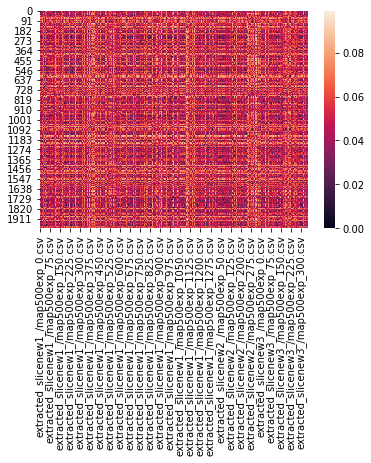

In [3]:
sns.heatmap(kappa_df)

### Cluster the results

For this research, agglomerative clustering with complete linkage is proposed. 

In [4]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage='complete').fit(kappa_df)
np.unique(clustering.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([855, 161, 283, 361, 261,  79], dtype=int64))

### Find middle maps

Find middle map for clusters:

For each cluster, the medoid map is identified:
1. Compute pairwise distance matric per cluster
2. Compute row sum
3. Find the minimum of the sums to identify medoid map

In [6]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

In [8]:
ooi_0 = kappa_df[clustering.labels_==0]
ooi_01 = ooi_0.T
cluster1 = ooi_01[clustering.labels_==0]
cluster1 = cluster1.T
maybe = np.triu(cluster1)
arr1 = cluster1.to_numpy()
cluster1['sum'] = cluster1.sum(axis=1)
cluster1[cluster1['sum']==cluster1['sum'].min()]

,extracted_slicenew1_/map500exp_1.csv,extracted_slicenew1_/map500exp_2.csv,extracted_slicenew1_/map500exp_4.csv,extracted_slicenew1_/map500exp_12.csv,extracted_slicenew1_/map500exp_14.csv,extracted_slicenew1_/map500exp_16.csv,extracted_slicenew1_/map500exp_18.csv,extracted_slicenew1_/map500exp_21.csv,extracted_slicenew1_/map500exp_23.csv,extracted_slicenew1_/map500exp_25.csv,...,extracted_slicenew3_/map500exp_328.csv,extracted_slicenew3_/map500exp_329.csv,extracted_slicenew3_/map500exp_331.csv,extracted_slicenew3_/map500exp_332.csv,extracted_slicenew3_/map500exp_336.csv,extracted_slicenew3_/map500exp_338.csv,extracted_slicenew3_/map500exp_339.csv,extracted_slicenew3_/map500exp_344.csv,extracted_slicenew3_/map500exp_349.csv,sum
1760,0.035563,0.045608,0.018837,0.040061,0.047777,0.02049,0.025661,0.033935,0.02268,0.03815,...,0.025692,0.050668,0.037093,0.027584,0.030132,0.037957,0.031104,0.025107,0.035395,26.275018


In [9]:
ooi_1 = kappa_df[clustering.labels_==1]
ooi_11 = ooi_1.T
cluster2 = ooi_11[clustering.labels_==1]
cluster2 = cluster2.T
cluster2['sum'] = cluster2.sum(axis=1)
cluster2[cluster2['sum']==cluster2['sum'].min()]

,extracted_slicenew1_/map500exp_8.csv,extracted_slicenew1_/map500exp_31.csv,extracted_slicenew1_/map500exp_49.csv,extracted_slicenew1_/map500exp_55.csv,extracted_slicenew1_/map500exp_63.csv,extracted_slicenew1_/map500exp_74.csv,extracted_slicenew1_/map500exp_86.csv,extracted_slicenew1_/map500exp_94.csv,extracted_slicenew1_/map500exp_109.csv,extracted_slicenew1_/map500exp_121.csv,...,extracted_slicenew3_/map500exp_247.csv,extracted_slicenew3_/map500exp_258.csv,extracted_slicenew3_/map500exp_261.csv,extracted_slicenew3_/map500exp_275.csv,extracted_slicenew3_/map500exp_292.csv,extracted_slicenew3_/map500exp_303.csv,extracted_slicenew3_/map500exp_326.csv,extracted_slicenew3_/map500exp_340.csv,extracted_slicenew3_/map500exp_347.csv,sum
1911,0.04499,0.034313,0.02353,0.034023,0.039421,0.040745,0.029748,0.029463,0.042713,0.031,...,0.023161,0.038366,0.0,0.030309,0.046905,0.03442,0.031806,0.02574,0.045411,5.127343


In [10]:
ooi_2 = kappa_df[clustering.labels_==2]
ooi_21 = ooi_2.T
cluster3 = ooi_21[clustering.labels_==2]
cluster3 = cluster3.T
cluster3['sum'] = cluster3.sum(axis=1)
cluster3[cluster3['sum']==cluster3['sum'].min()]

,extracted_slicenew1_/map500exp_0.csv,extracted_slicenew1_/map500exp_38.csv,extracted_slicenew1_/map500exp_42.csv,extracted_slicenew1_/map500exp_46.csv,extracted_slicenew1_/map500exp_48.csv,extracted_slicenew1_/map500exp_52.csv,extracted_slicenew1_/map500exp_53.csv,extracted_slicenew1_/map500exp_65.csv,extracted_slicenew1_/map500exp_66.csv,extracted_slicenew1_/map500exp_73.csv,...,extracted_slicenew3_/map500exp_282.csv,extracted_slicenew3_/map500exp_297.csv,extracted_slicenew3_/map500exp_306.csv,extracted_slicenew3_/map500exp_312.csv,extracted_slicenew3_/map500exp_323.csv,extracted_slicenew3_/map500exp_334.csv,extracted_slicenew3_/map500exp_337.csv,extracted_slicenew3_/map500exp_342.csv,extracted_slicenew3_/map500exp_343.csv,sum
359,0.026836,0.024598,0.022822,0.035581,0.024262,0.037884,0.040794,0.044129,0.006502,0.033604,...,0.046217,0.042627,0.030249,0.035704,0.040925,0.019305,0.045509,0.035492,0.019731,9.556665


In [11]:
ooi_3 = kappa_df[clustering.labels_==3]
ooi_31 = ooi_3.T
cluster4 = ooi_31[clustering.labels_==3]
cluster4 = cluster4.T
cluster4['sum'] = cluster4.sum(axis=1)
cluster4[cluster4['sum']==cluster4['sum'].min()]

,extracted_slicenew1_/map500exp_3.csv,extracted_slicenew1_/map500exp_5.csv,extracted_slicenew1_/map500exp_6.csv,extracted_slicenew1_/map500exp_9.csv,extracted_slicenew1_/map500exp_10.csv,extracted_slicenew1_/map500exp_19.csv,extracted_slicenew1_/map500exp_22.csv,extracted_slicenew1_/map500exp_24.csv,extracted_slicenew1_/map500exp_33.csv,extracted_slicenew1_/map500exp_34.csv,...,extracted_slicenew3_/map500exp_314.csv,extracted_slicenew3_/map500exp_315.csv,extracted_slicenew3_/map500exp_327.csv,extracted_slicenew3_/map500exp_330.csv,extracted_slicenew3_/map500exp_333.csv,extracted_slicenew3_/map500exp_335.csv,extracted_slicenew3_/map500exp_341.csv,extracted_slicenew3_/map500exp_345.csv,extracted_slicenew3_/map500exp_346.csv,sum
1148,0.023045,0.033336,0.004881,0.005685,0.005095,0.033268,0.024046,0.028358,0.03783,0.022936,...,0.016603,0.02475,0.02232,0.022498,0.009953,0.023534,0.012323,0.032718,0.042329,9.900235


In [12]:
ooi_4 = kappa_df[clustering.labels_==4]
ooi_41 = ooi_4.T
cluster5 = ooi_41[clustering.labels_==4]
cluster5 = cluster5.T
cluster5['sum'] = cluster5.sum(axis=1)
cluster5[cluster5['sum']==cluster5['sum'].min()]

,extracted_slicenew1_/map500exp_7.csv,extracted_slicenew1_/map500exp_13.csv,extracted_slicenew1_/map500exp_15.csv,extracted_slicenew1_/map500exp_20.csv,extracted_slicenew1_/map500exp_43.csv,extracted_slicenew1_/map500exp_47.csv,extracted_slicenew1_/map500exp_69.csv,extracted_slicenew1_/map500exp_72.csv,extracted_slicenew1_/map500exp_81.csv,extracted_slicenew1_/map500exp_83.csv,...,extracted_slicenew3_/map500exp_294.csv,extracted_slicenew3_/map500exp_302.csv,extracted_slicenew3_/map500exp_304.csv,extracted_slicenew3_/map500exp_316.csv,extracted_slicenew3_/map500exp_318.csv,extracted_slicenew3_/map500exp_321.csv,extracted_slicenew3_/map500exp_322.csv,extracted_slicenew3_/map500exp_324.csv,extracted_slicenew3_/map500exp_348.csv,sum
695,0.021637,0.036078,0.00619,0.036367,0.027606,0.017836,0.02166,0.031054,0.046158,0.019954,...,0.02692,0.032739,0.022904,0.027631,0.029343,0.015713,0.029161,0.026093,0.04692,7.241276


In [13]:
ooi_5 = kappa_df[clustering.labels_==5]
ooi_51 = ooi_5.T
cluster6 = ooi_51[clustering.labels_==5]
cluster6 = cluster6.T
cluster6['sum'] = cluster6.sum(axis=1)
cluster6[cluster6['sum']==cluster6['sum'].min()]

,extracted_slicenew1_/map500exp_11.csv,extracted_slicenew1_/map500exp_17.csv,extracted_slicenew1_/map500exp_116.csv,extracted_slicenew1_/map500exp_117.csv,extracted_slicenew1_/map500exp_145.csv,extracted_slicenew1_/map500exp_175.csv,extracted_slicenew1_/map500exp_182.csv,extracted_slicenew1_/map500exp_202.csv,extracted_slicenew1_/map500exp_209.csv,extracted_slicenew1_/map500exp_232.csv,...,extracted_slicenew2_/map500exp_329.csv,extracted_slicenew3_/map500exp_62.csv,extracted_slicenew3_/map500exp_77.csv,extracted_slicenew3_/map500exp_172.csv,extracted_slicenew3_/map500exp_187.csv,extracted_slicenew3_/map500exp_239.csv,extracted_slicenew3_/map500exp_251.csv,extracted_slicenew3_/map500exp_270.csv,extracted_slicenew3_/map500exp_310.csv,sum
456,0.019796,0.038631,0.023611,0.044498,0.017887,0.011878,0.046442,0.023023,0.012018,0.021479,...,0.016534,0.041214,0.014766,0.036564,0.015383,0.048585,0.040322,0.015416,0.021321,2.114996
